# Amazon Data Manipulation
#### Data from Kaggle: [Amazon Sales Dataset](https://www.kaggle.com/datasets/piyushjain16/amazon-product-data)

## TABLE OF CONTENT
### $~~~$ - 1. Preview
### $~~~$ - 2. Drop NaN
### $~~~$ - 3. Check PRODUCT_ID Duplication
### $~~~$ - 4. Save to CSV
### $~~~$ - 5. Visualization

---
## 1. Preview

In [1]:
from datasets import load_dataset
from tqdm import tqdm
import pandas as pd

In [2]:
amazon_products_dataset = load_dataset('Studeni/AMAZON-Products-2023')
amazon_products_dataset

DatasetDict({
    train: Dataset({
        features: ['parent_asin', 'date_first_available', 'title', 'description', 'filename', 'main_category', 'categories', 'store', 'average_rating', 'rating_number', 'price', 'features', 'details', 'embeddings', 'image', '__index_level_0__'],
        num_rows: 117243
    })
})

In [3]:
amazon_products_df = pd.DataFrame(
    {
        'PRODUCT_ID': amazon_products_dataset['train']['parent_asin'],
        'TITLE': [x.replace('\n', ' ') for x in amazon_products_dataset['train']['title']],
        'DESCRIPTION': [x.replace('\n', ' ') for x in amazon_products_dataset['train']['description']],
        'MAIN_CATEGORY': amazon_products_dataset['train']['main_category'],
        'CATEGORIES': amazon_products_dataset['train']['categories'],
        'AVERAGE_RATING': amazon_products_dataset['train']['average_rating'],
        'RATING_NUMBER': amazon_products_dataset['train']['rating_number'],
        'PRICE': amazon_products_dataset['train']['price'],
        'DETAILS': [x.replace('\n', ' ') for x in amazon_products_dataset['train']['details']],
    }
)
amazon_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117243 entries, 0 to 117242
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PRODUCT_ID      117243 non-null  object 
 1   TITLE           117243 non-null  object 
 2   DESCRIPTION     117243 non-null  object 
 3   MAIN_CATEGORY   92438 non-null   object 
 4   CATEGORIES      117243 non-null  object 
 5   AVERAGE_RATING  117243 non-null  float64
 6   RATING_NUMBER   117237 non-null  float64
 7   PRICE           81374 non-null   float64
 8   DETAILS         117243 non-null  object 
dtypes: float64(3), object(6)
memory usage: 8.1+ MB


In [4]:
amazon_products_df

,PRODUCT_ID,TITLE,DESCRIPTION,MAIN_CATEGORY,CATEGORIES,AVERAGE_RATING,RATING_NUMBER,PRICE,DETAILS
0,B000044U2O,Anomie & Bonhomie,Amazon.com Fans of Scritti Politti's synth-pop...,Digital Music,[],4.2,56.0,NaN,"{'Date First Available': 'April 29, 2023'}"
1,B0BT4CWWC9,Sunshine On My Shoulders: The Best Of John Den...,"“Sunshine On My Shoulders” is a 2CD, 36-track ...",Digital Music,[],4.7,502.0,19.98,{'Package Dimensions': '5.55 x 4.92 x 0.51 inc...
2,B0BS4L5LP6,18 Greatest Hits of 38 Special,Track Listings: 1. Rockin' Into The Night 2. ...,Digital Music,[],5.0,1.0,14.97,"{'Item Weight': '4 Ounces', 'Run time': '1 hou..."
3,B0BSPBBP89,The Gift [CD],Second studio album by the multi-million-selli...,Digital Music,[],4.8,34.0,12.99,{'Package Dimensions': '5.59 x 4.8 x 0.47 inch...
4,B0BT1YG8MV,ΤΗΕ ΒΟΟΤLΕG SΕRΙΕS VοΙ. ᛐ7 ᛐ996-ᛐ997 FRΑԌΜΕΝΤՏ...,"EU Edition 2CD, DISC ONE - TIME OUT OF MIND [2...",Digital Music,[],3.6,5.0,43.99,"{'Manufacturer': 'Columbia Records, Sony Music..."
...,...,...,...,...,...,...,...,...,...
117238,B0C4BDXRRL,Damaged Screw Extractor Kit and Stripped Screw...,DESCRIPTION:Material: High-Speed Steel H.S.S 4...,Tools & Home Improvement,"[Tools & Home Improvement, Power & Hand Tools,...",2.6,70.0,NaN,"{'Manufacturer': 'GZXHMY', 'Item Weight': '3.2..."
117239,B0BWC5XFFY,RYOBI 18V Corner Cat Finish Sander,RYOBI introduces the all new 18V ONE+ Cordless...,Tools & Home Improvement,"[Tools & Home Improvement, Power & Hand Tools,...",4.2,37.0,45.32,"{'Brand': 'RYOBI', 'Item Dimensions LxWxH': '6..."
117240,B0BX6G6F8G,"FAUYES Neon Rope Lights, 10.49FT RGB Neon Stri...","FAUYES Neon Rope Lights, 10.49FT RGB Neon Stri...",Tools & Home Improvement,"[Tools & Home Improvement, Lighting & Ceiling ...",4.4,50.0,NaN,"{'Brand': 'FAUYES', 'Indoor/Outdoor Usage': 'O..."
117241,B0BWN4XTKR,walsport 24 Bathroom Vanity with Sink White Mo...,This Modern Bathroom Vanity has large storage ...,None,"[Tools & Home Improvement, Kitchen & Bath Fixt...",2.9,2.0,NaN,"{'Brand': 'walsport', 'Color': 'White', 'Produ..."


---
## 2. Drop NaN

In [5]:
import os

In [6]:
amazon_products_df.dropna(subset=['MAIN_CATEGORY'], inplace=True)
amazon_products_df.reset_index(inplace=True, drop=True)

In [7]:
amazon_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92438 entries, 0 to 92437
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRODUCT_ID      92438 non-null  object 
 1   TITLE           92438 non-null  object 
 2   DESCRIPTION     92438 non-null  object 
 3   MAIN_CATEGORY   92438 non-null  object 
 4   CATEGORIES      92438 non-null  object 
 5   AVERAGE_RATING  92438 non-null  float64
 6   RATING_NUMBER   92432 non-null  float64
 7   PRICE           67721 non-null  float64
 8   DETAILS         92438 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.3+ MB


---
## 3. Check PRODUCT_ID Duplication

In [20]:
'[*] PRODUCT_ID none duplicate: ' + str(amazon_products_df['PRODUCT_ID'].nunique() == amazon_products_df.shape[0])

'[*] PRODUCT_ID none duplicate: True'

---
## 4. Save to CSV

In [8]:
base_dir = "../trainData"

In [9]:
amazon_products_df.to_csv(os.path.join(base_dir, 'amazon_products.train.csv'), index=False)

---
## 5. Visualization

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Categories

In [11]:
categories = Counter(amazon_products_df['MAIN_CATEGORY'])

In [12]:
descending_categories = dict(categories.most_common())

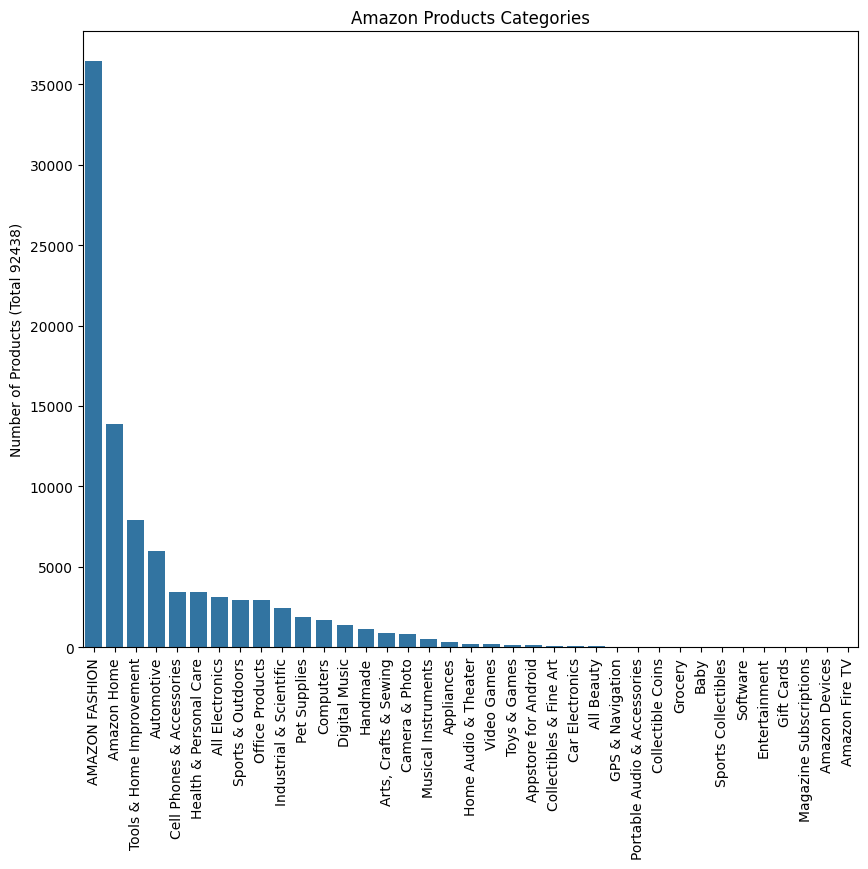

In [13]:
plt.figure(figsize = (10,8))
sns.barplot(x=list(descending_categories.keys()), y=list(descending_categories.values()))
plt.xticks(rotation = 90)
plt.ylabel(f'Number of Products (Total {amazon_products_df.shape[0]})')
plt.title('Amazon Products Categories')
plt.show()

### Description Tokens

In [14]:
description_length = {}
for i in tqdm(amazon_products_df.index):
    curr_description_len = len(amazon_products_df.loc[i, 'DESCRIPTION'].split(' '))
    description_length.setdefault(curr_description_len, 0)
    description_length[curr_description_len] += 1

100%|██████████| 92438/92438 [00:01<00:00, 84397.24it/s]


In [15]:
descending_description_length = dict(sorted(description_length.items(), key=lambda item: item[0], reverse=False))

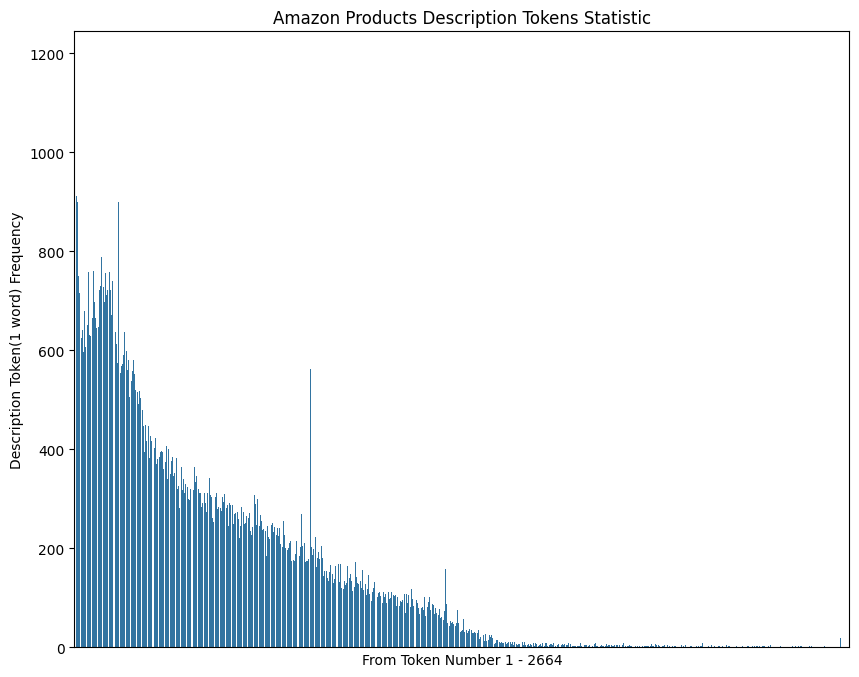

In [16]:
plt.figure(figsize = (10,8))
sns.barplot(x=list(descending_description_length.keys()), y=list(descending_description_length.values()))
plt.xticks([])
plt.ylabel('Description Token(1 word) Frequency')
plt.xlabel(f'From Token Number {np.min(list(descending_description_length.keys()))} - {np.max(list(descending_description_length.keys()))}')
plt.title('Amazon Products Description Tokens Statistic')
plt.show()

In [17]:
f'Description tokens >= 512 ratio: {round((np.sum([v for k, v in descending_description_length.items() if k <= 512])/amazon_products_df.shape[0])*100, 2)}%'

'Description tokens >= 512 ratio: 99.77%'